<a href="https://www.kaggle.com/code/evertonkozloski/analise-grafica-de-acoes?scriptVersionId=138395913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Apresentação

Análise e visualização de dados do mercado de ações com Python, Pandas, NumPy, Seaborn e Matplotlib. <br>
Achei conveniente incluir as fórmulas em notação matemática das diferentes fórmulas  utilizadas para calcular  os métodos de análise, comentários sobre os algoritmos usados e adaptação do código. <br>
A extraçao de dados da Api do yahoo Finance foi realizada utilizando biblioteca python yfinance ao invéz da lib DataReader <br>


In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.3 MB/s eta 0:00:00


In [2]:
# Imports
from datetime import datetime

import matplotlib.pyplot as pyplot
import numpy
import pandas
import pytz
import seaborn
import yfinance as yf
from IPython.display import Latex, Math, display
from pandas_datareader import DataReader

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Extraçao do histórico de dados das ações durante o ultimo ano das empresas da bolsa: Google, Amazon, Netflix, Meta(facebook) numa única variável global  do tipo series "stock" indexada por Datetime.

In [3]:
stocks_list = ["META", "AMZN", "NFLX", "GOOG"]
tz = pytz.timezone("America/New_York")
start = tz.localize(
    datetime(datetime.now().year - 1, datetime.now().month, datetime.now().day)
)
end = tz.localize(datetime.now())

for stock in stocks_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
META.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-24  295.779999  297.519989  288.299988  291.609985  291.609985   
2023-07-25  295.190002  298.299988  291.859985  294.470001  294.470001   
2023-07-26  301.190002  301.769989  291.899994  298.570007  298.570007   
2023-07-27  325.119995  325.350006  309.839996  311.709991  311.709991   
2023-07-28  316.880005  326.200012  314.250000  325.480011  325.480011   

              Volume  
Date                  
2023-07-24  24915700  
2023-07-25  19585600  
2023-07-26  47256900  
2023-07-27  64229200  
2023-07-28  39160700

In [5]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-08-01 to 2023-07-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


#### Vizualização gráfica da variação das ações do Google durante o periodo de um ano. <br>

Adj Close = Fechamento Ajustado, valor do fechamento deduzido os vários proventos: Dividendos, desdobramentos, etc. As quais vem previamnte caluculadas no dataframe mas a título de curiosidade usam os seguintes cálculos: <br>
<br>
* Dividendo:   $$F = \frac{1 – D} {Pu}$$  <br>
* Bonificação: $$F = \frac{1} {(1 + b)}$$<br>
* Desdobramento: $$F = \frac{1} {d}$$ <br>
* Redução de Capital: $$F = {1} {(1 – r)}$$ <br>
* Grupamento: $$F = g$$ <br>
* Subscrição: $$F = \frac{(Pu + s * S)} {((1 + s) * Pu)}$$ <br>
* Cisão: $$F = (\frac{1 – c} {100})$$ <br>


Legenda:

> *F = fator de ajuste <br>
    D = Valor do dividendo<br>
    Pu = Preço original na última data “com” (data imediatamente anterior à data EX)<br>
    b = Quantidade de ações novas recebidas por cada ação possuída<br>
    d = Quantidade de ações novas que substituirão cada ação antiga<br>
    r = Quantidade de ações canceladas para cada ação possuída<br>
    g = Quantidade de ações antigas que serão substituídas por cada ação nova<br>
    S = Preço da subscrição<br>
    s = Quantidade de ações novas ofertadas por cada ação possuída<br>
    c = porcentagem que a parte cindida representava do valor de mercado da empresa antes da cisão*<br>

<Axes: xlabel='Date'>

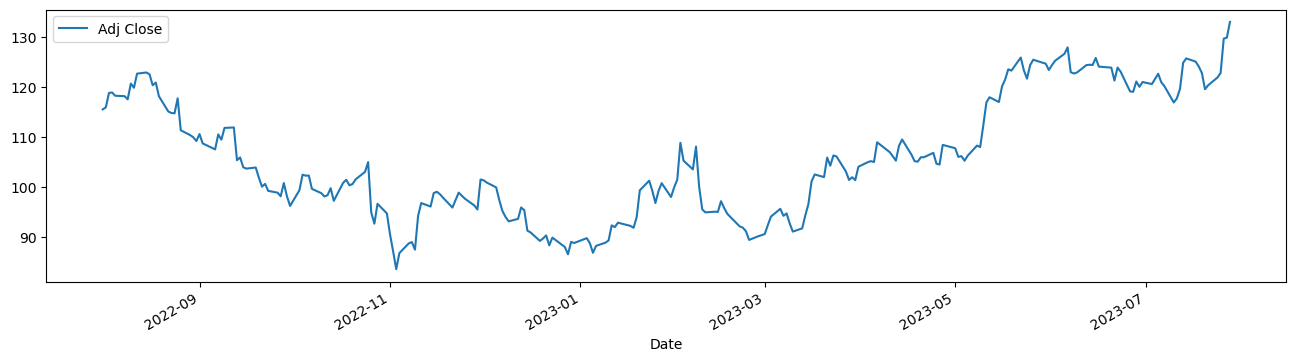

In [6]:
GOOG["Adj Close"].plot(legend=True, figsize=(16, 4))

<Axes: xlabel='Date'>

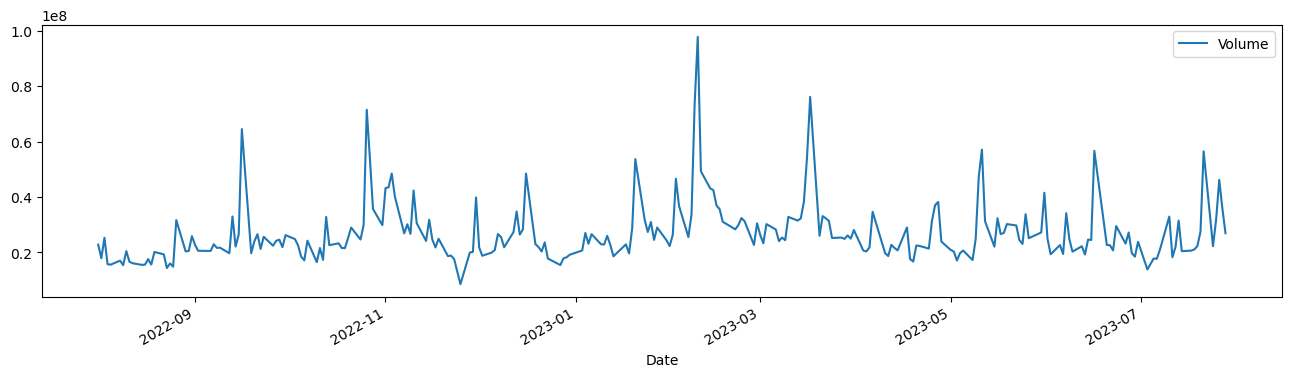

In [7]:
GOOG["Volume"].plot(legend=True, figsize=(16, 4))

# Médias Móveis
##### (SMA) Simple Moving Average
Tirar uma média móvel é um processo de suavização. <br>
Uma forma alternativa de resumir os dados passados é calcular a média de sucessivos conjuntos menores de números de dados passados como segue. <br>
Lembre-se do conjunto de números 9, 8, 9, 12, 9, 12, 11, 7, 13, 9, 11, 10, que eram a quantia em dólares de 12 fornecedores selecionados aleatoriamente. Vamos definir M, o tamanho do "conjunto menor" igual a 3. Então a média dos 3 primeiros números é: (9 + 8 + 9) / 3 = 8,667.<br>
Isso é chamado de "suavização" (ou seja, alguma forma de média). Esse processo de suavização continua avançando um período e calculando a próxima média de três números, descartando o primeiro número.

A expressão geral para a média móvel é:

$$ MA_t= \frac{X_t+X_{t-1}+...+X_{t-n+1}} {n}$$ 

<Axes: xlabel='Date'>

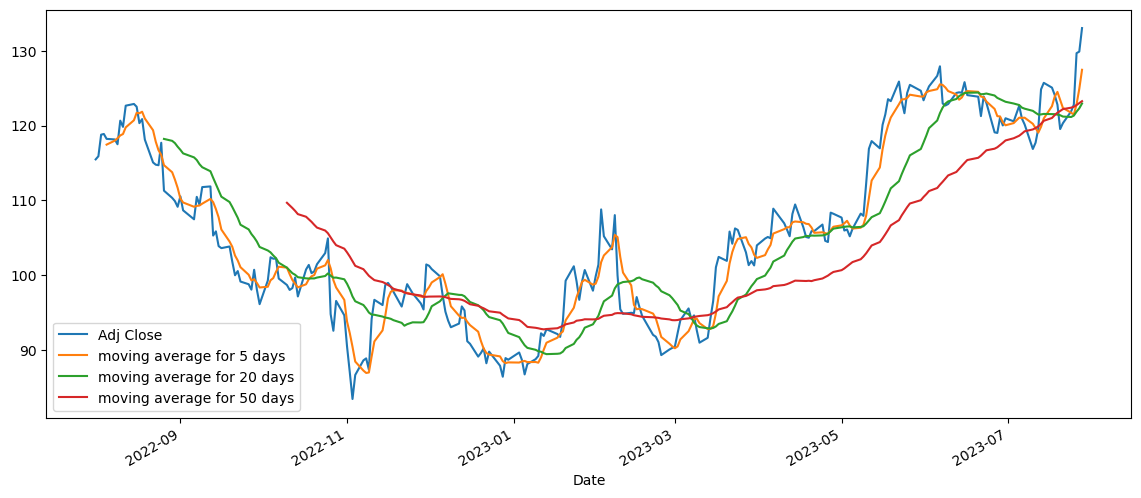

In [8]:
# MA -> moving average / medias móveis
# calcularemos com 3 conjuntos menores diferentes
moving_average_intervals = [5, 20, 50]

for moving_average in moving_average_intervals:
    column_name = "moving average for %s days" % (str(moving_average))
    GOOG[column_name] = GOOG["Adj Close"].rolling(moving_average).mean()

GOOG[
    [
        "Adj Close",
        "moving average for 5 days",
        "moving average for 20 days",
        "moving average for 50 days",
    ]
].plot(figsize=(14, 6))

# Daily Return 
Alteração percentual entre o elemento atual e um elemento anterior.
retorna um DataFrame com a diferença percentual entre os valores de cada linha e, por padrão, a linha anterior.

$$ \bigtriangleup V = \left(\frac{V_2 - V_1}{|V_1|}\right) \times 100 $$

<Axes: xlabel='Date'>

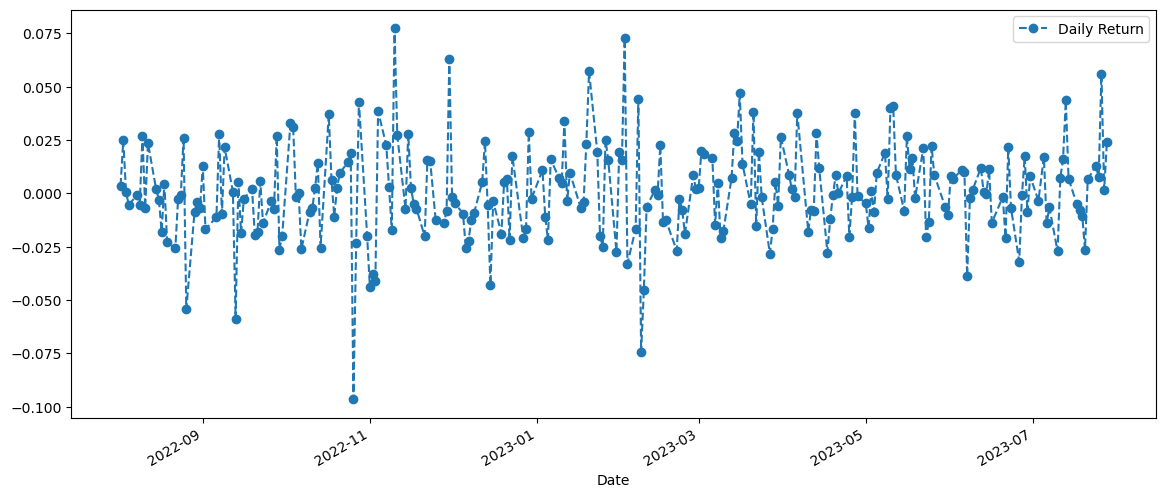

In [9]:
# Daily Return
GOOG["Daily Return"] = GOOG["Adj Close"].pct_change()

GOOG["Daily Return"].plot(figsize=(14, 6), legend=True, linestyle="--", marker="o")

In [10]:
tickers = "MA,V,AMZN,JPM,BA,NFLX,GOOG,META,TSLA".split(",")
df = yf.download(tickers, start, end)["Adj Close"]

[*********************100%***********************]  9 of 9 completed


Criando o gráfico de dispersão (scatter plot)  por padrão com dois histogramas nas margens superior e direita do gráfico
para comparar o retorno de diferentes ações.
O Diagrama de Dispersão, também conhecido como Gráfico de Dispersão ou de Correlação, é uma ferramenta  utilizada quando se deseja expor o quanto uma variável é afetada por outra, ou seja, a relação entre duas variáveis.

para saber mais: https://www.8quali.com.br/interpretando-o-diagrama-de-dispersao/

Um gráfico de pares plota relacionamentos pareados em um conjunto de dados. A função pairplot cria uma grade de eixos de modo que cada variável nos dados seja compartilhada no eixo y em uma única linha e no eixo x em uma única coluna. Isso cria gráficos como mostrado abaixo.

Para saber mais sobre os histograms localizados na parte superior e direita do gráfico leia aqui: https://support.minitab.com/pt-br/minitab/21/help-and-how-to/graphs/histogram/interpret-the-results/key-results/

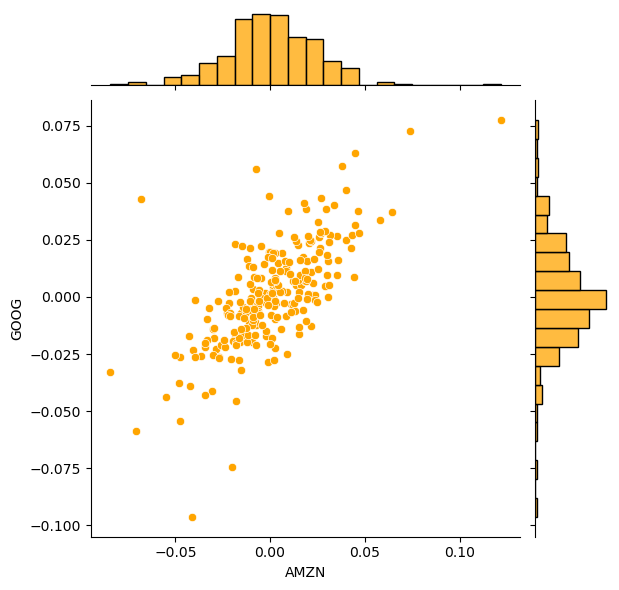

In [11]:
stock_returns = df.pct_change()
seaborn.jointplot(x="AMZN", y="GOOG", data=stock_returns, color="orange")  # GOOG

In [12]:
stock_returns.head()

AMZN        BA      GOOG       JPM        MA      META  \
Date                                                                     
2022-08-01       NaN       NaN       NaN       NaN       NaN       NaN   
2022-08-02 -0.009085 -0.034246  0.003637 -0.015585 -0.004365  0.001626   
2022-08-03  0.039952  0.020578  0.024849  0.010495  0.014670  0.053749   
2022-08-04  0.021861 -0.000840  0.000758 -0.011003  0.005478  0.010486   
2022-08-05 -0.012415 -0.008769 -0.005468  0.030260  0.004044 -0.020285   

                NFLX      TSLA         V  
Date                                      
2022-08-01       NaN       NaN       NaN  
2022-08-02 -0.021175  0.011134 -0.024129  
2022-08-03  0.023982  0.022656  0.010763  
2022-08-04  0.014026  0.004023  0.023935  
2022-08-05 -0.013614 -0.066303  0.011243

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


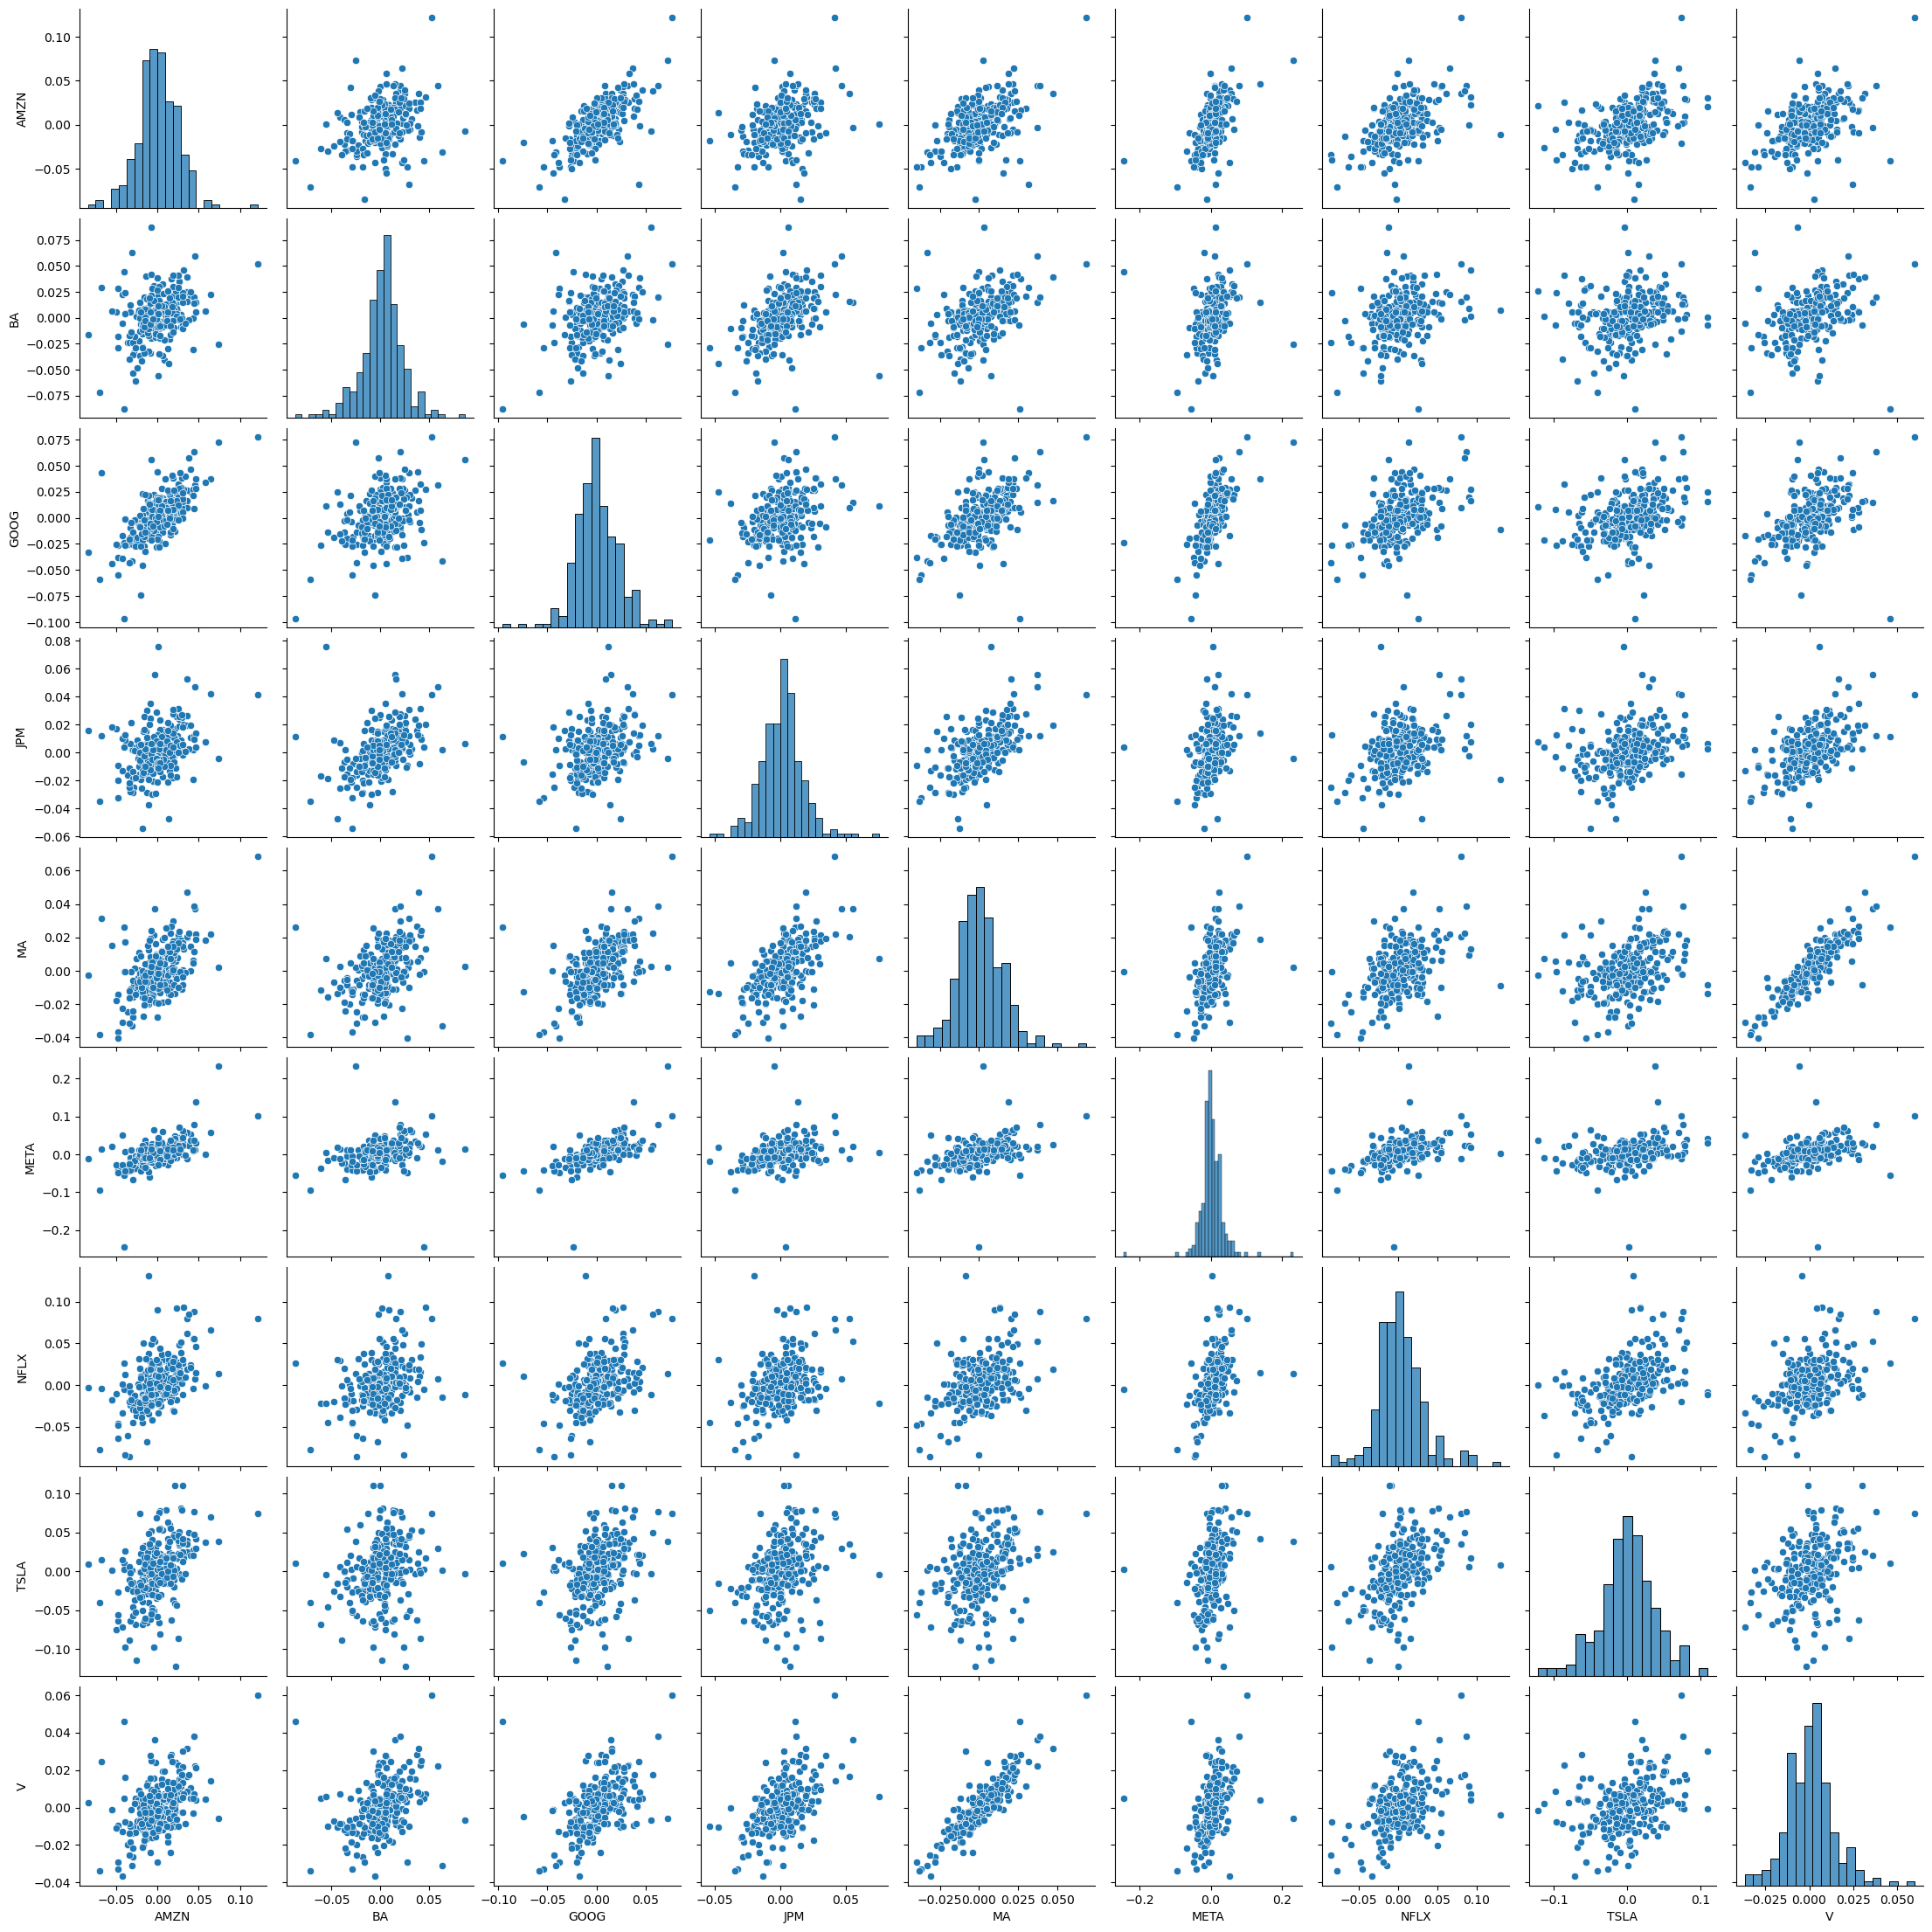

In [13]:
seaborn.pairplot(data=stock_returns.dropna())

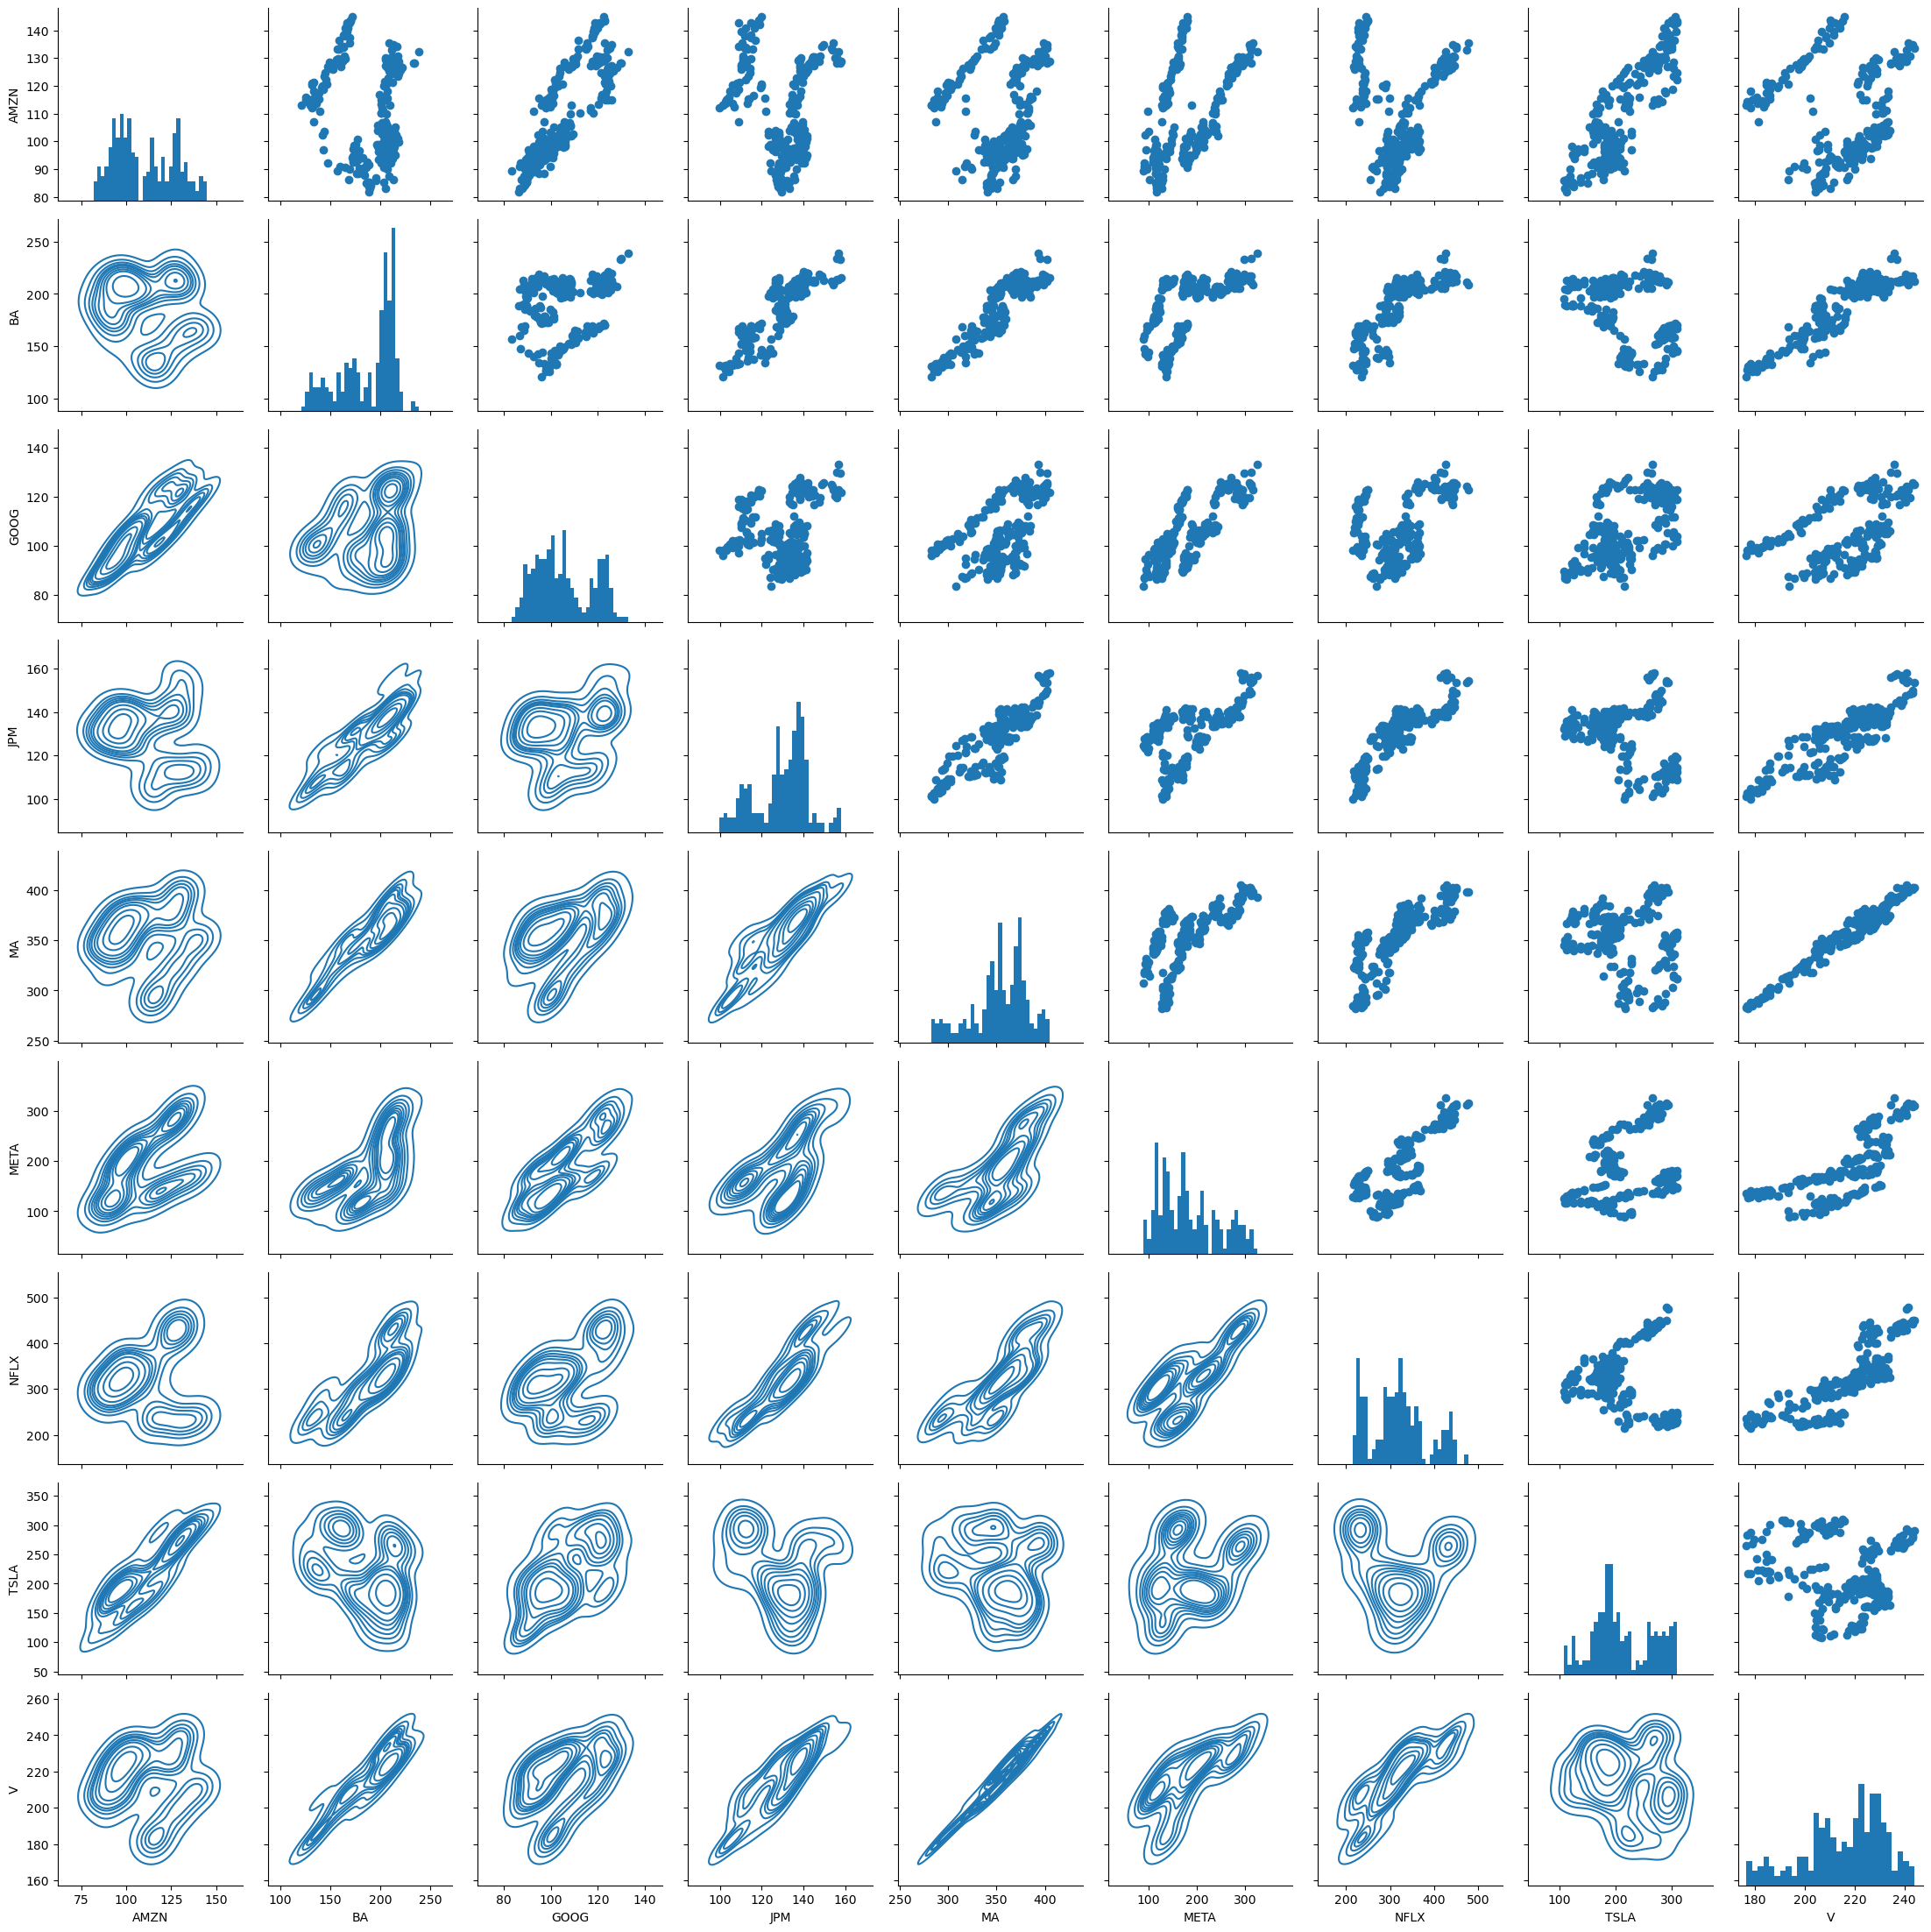

In [14]:
returns_figure = seaborn.PairGrid(data=df)
returns_figure.map_upper(pyplot.scatter)
returns_figure.map_diag(pyplot.hist, bins=30)
returns_figure.map_lower(seaborn.kdeplot)

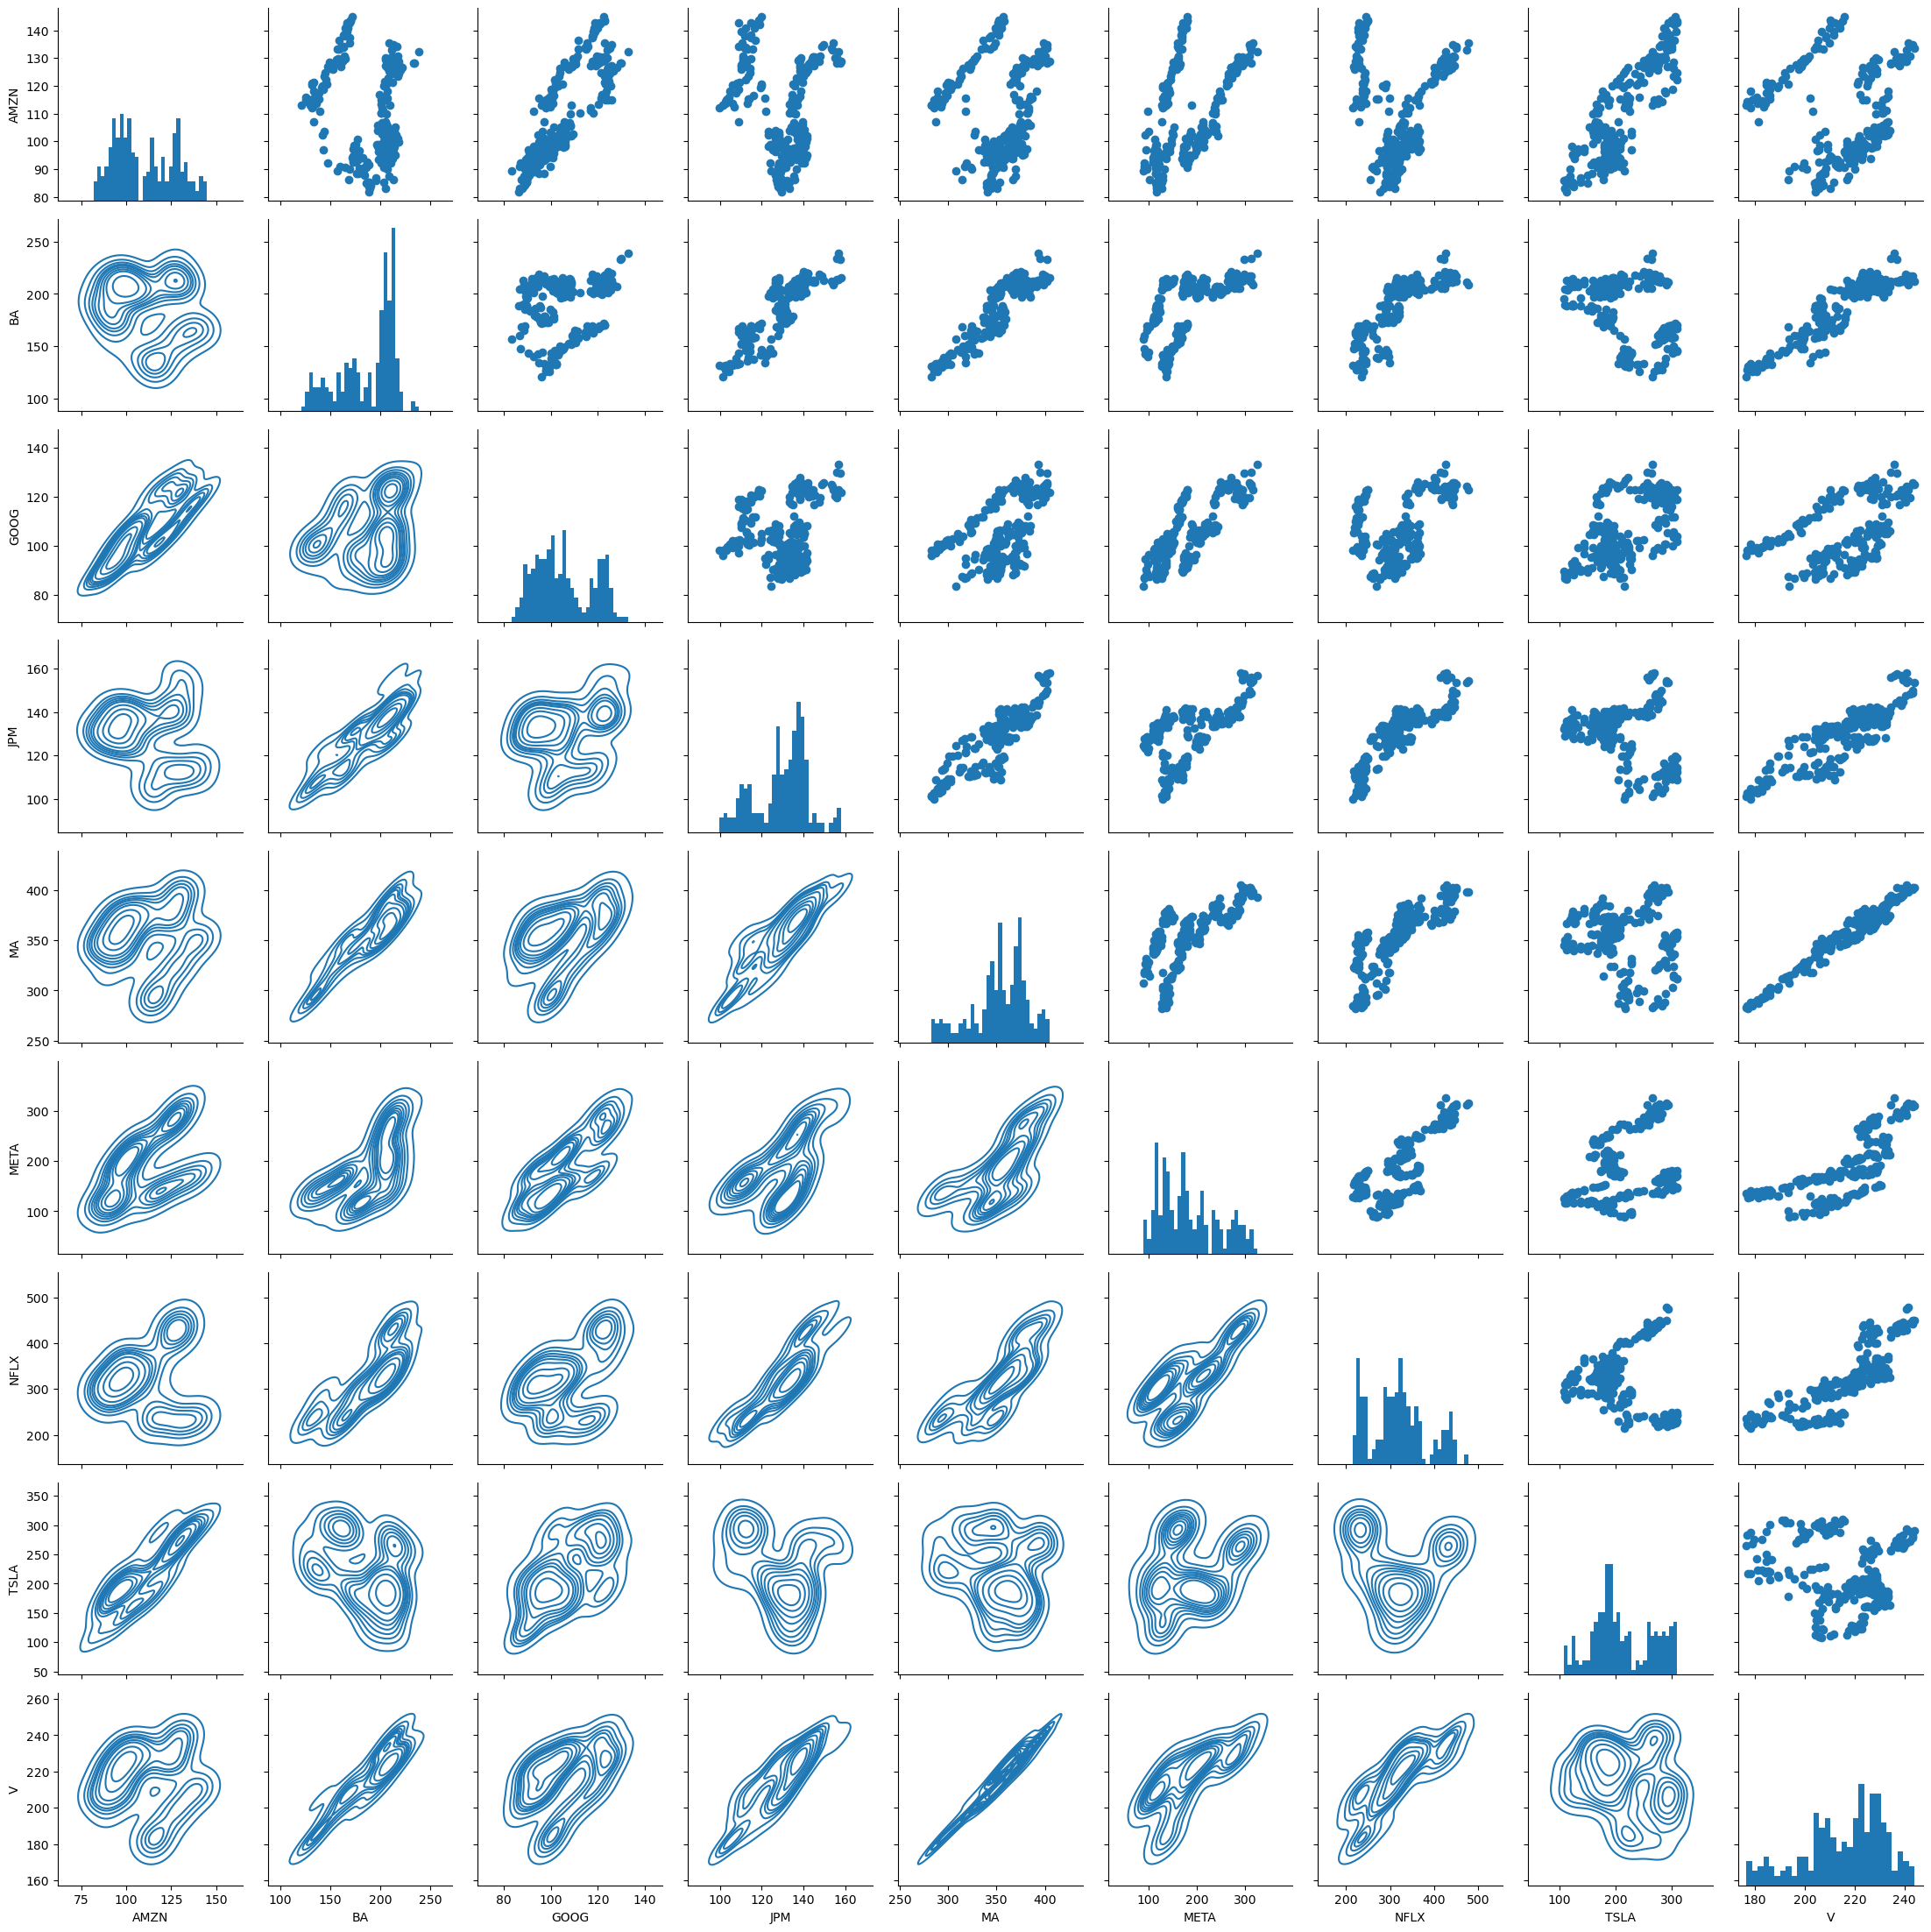

In [15]:
returns_figure = seaborn.PairGrid(data=df)
returns_figure.map_upper(pyplot.scatter)
returns_figure.map_diag(pyplot.hist, bins=30)
returns_figure.map_lower(seaborn.kdeplot)

<Axes: >

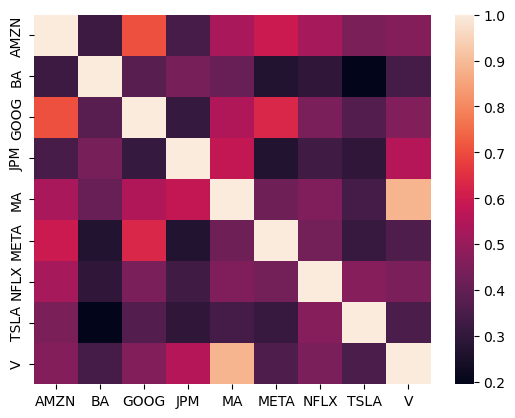

In [16]:
correlations = stock_returns.corr()
seaborn.heatmap(data=correlations, fmt="6g")

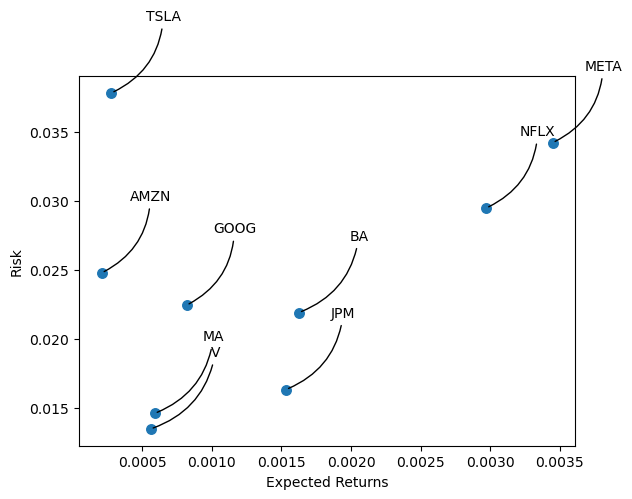

In [17]:
returns = stock_returns.dropna()
circle_area = numpy.pi * 15
pyplot.scatter(x=returns.mean(), y=returns.std(), s=circle_area)
pyplot.xlabel("Expected Returns")
pyplot.ylabel("Risk")

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    pyplot.annotate(
        label,
        xy=(x, y),
        xytext=(50, 50),
        textcoords="offset points",
        ha="right",
        va="bottom",
        arrowprops=dict(arrowstyle="-", connectionstyle="arc3, rad = -0.3"),
    )

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


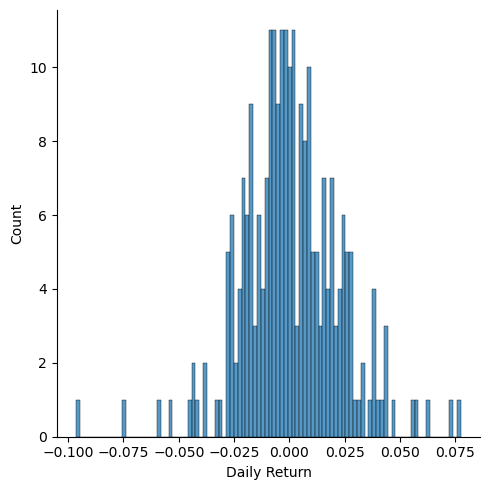

In [18]:
seaborn.displot(GOOG["Daily Return"].dropna(), bins=100)

### Cálculo de retorno máximo e mínimo utilizando quantils

A função quantil gera o valor de uma variável aleatória de modo que sua probabilidade seja menor ou igual a um valor de probabilidade de entrada. Intuitivamente, a função quantil associa a um intervalo tanto em, quanto abaixo de uma entrada de probabilidade em que a probabilidade de uma variável aleatória seja realizada nesse intervalo para alguma distribuição de probabilidade. Também é chamada de função percentil (depois do percentil), função de ponto percentual ou função de distribuição cumulativa inversa (depois da função de distribuição cumulativa).

Com referência a uma função de distribuição cumulativa contínua e estritamente monotônica $ F_{X}\colon \mathbb {R} \to [0,1]$ de uma variável aleatória $X$, o quantil função $Q\colon [0,1]\to \mathbb {R} $ mapeia sua entrada $p$ para um valor limite $x$ de modo que a probabilidade de $X$ ser menor ou igual a $x$ é $p$. Em termos da função de distribuição $F$, a função quantílica $Q$ retorna o valor $x$ tal que

$$F_{X}(x):=\Pr(X\leq x)=p\,$$

Usada aqui para calcular valor por risco, a perca e ganhos máximos por dia em determinada ação.


In [19]:
returns["META"].quantile(0.05) * 100

-3.9943066849265003

In [20]:
returns["META"].quantile(0.95) * 100

5.006733431839285

In [21]:
NFLX.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-08-01  223.100006  228.389999  221.000000  226.210007  226.210007   
2022-08-02  222.759995  228.199997  220.880005  221.419998  221.419998   
2022-08-03  224.789993  228.100006  222.419998  226.729996  226.729996   
2022-08-04  227.679993  232.070007  225.050003  229.910004  229.910004   
2022-08-05  225.300003  228.619995  222.869995  226.779999  226.779999   

             Volume  
Date                 
2022-08-01  5525000  
2022-08-02  6361300  
2022-08-03  6400700  
2022-08-04  7142700  
2022-08-05  5539700

In [22]:
starting_price = 226.75

# Monte Carlo Analysis

A simulação de Monte-Carlo simula os preços das ações, calcula o retorno da opção para cada um desses preços simulados, encontra o retorno médio e, em seguida, desconta o retorno médio. Em primeiro lugar, começamos com números uniformes $iid$ $u_{1}$ a $u_{n}$, calculamos a variável normal padrão $z_{i}$ como $ z_{i} = N^{-1} (u_i) $ , convertemos para variável normal $ r_i = \mu + \sigma z_i $ . A variância da estimativa de Monte-Carlo é calculada como $ e^{-2rT} \times \frac{s^{2}}{n} $ .




$$ S(T) = S(0) e^{(a - \delta - \frac{\sigma^2}{2})T + \sigma \sqrt{T} z}  $$
$$ S(T) = S(t) e^{(a - \delta - \frac{\sigma^2}{2})(T-t) + \sigma (Z(T) - Z(t))}  $$
$$ \text{Variance} $$
$$ e^{-2rT} \times \frac{s^{2}}{n} $$
$$ s^{2} = \frac{1}{n-1} \sum [(g(S_{i}) - \bar{g})]^{2}$$

Legenda:

>$ S(T) $ : O preço das ações no tempo T <br>
$ S(t) $ : O preço da ação no tempo t, que está mais próximo do preço da ação no estágio final S(T)<br>
$ g_i $ : O i-ésimo payoff (pagamento) simulado<br>
$ e^{-2rT} \times \frac{s^{2}}{n} $ :  Avariância do preó das ações<br>


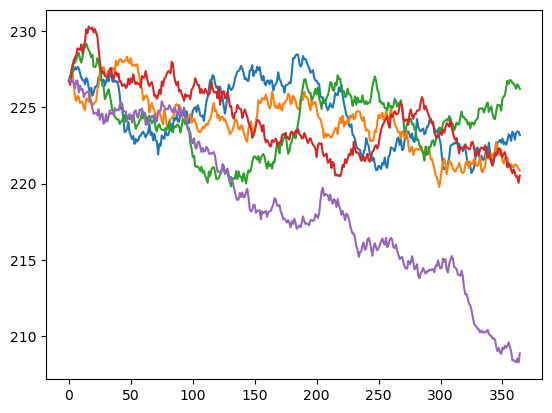

In [23]:
days = 365
dt = 1 / days
sigma = returns.std()["NFLX"]
mu = returns.mean()["NFLX"]


def monte_carlo_analysis(starting_price, days, mu, sigma):
    price = numpy.zeros(days)
    price[0] = starting_price
    shock = numpy.zeros(days)
    drift = numpy.zeros(days)

    for day in range(1, days):
        shock[day] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        drift[day] = mu * dt
        price[day] = price[day - 1] + (price[day - 1] * (drift[day] + shock[day]))
    return price


for run in range(5):
    price = monte_carlo_analysis(starting_price, days, mu, sigma)
    pyplot.plot(price)

Trabalho contendo material de um tutorial de  https://mammothinteractive.com <br>
Não possuo afiliaçao mas recomendo a instituição, apesar de serem em video em inglês e sem legendas, eles vão muito além do básico e cobrem tecnologias recentes de mercado com profundidade.